# Scalar Riccati Equation Plots

James Yu, 7 February 2024

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

To plot the Riccati equation, I first use the Sympy symbolic solver to obtain a closed-form expression for $k$.

In [2]:
delta, c, b2, n, k = symbols("delta c b^2 n k")
b2

b^2

In [3]:
RHS = -(delta**2 * b2) * k**2 / (c + delta * k * b2) + delta * k + 1/n
RHS

-b^2*delta**2*k**2/(b^2*delta*k + c) + delta*k + 1/n

In [4]:
LHS = k
RHS - LHS

-b^2*delta**2*k**2/(b^2*delta*k + c) + delta*k - k + 1/n

In [5]:
solve(RHS - LHS, k)

[(b^2*delta + c*delta*n - c*n - sqrt(b^2**2*delta**2 + 2*b^2*c*delta**2*n + 2*b^2*c*delta*n + c**2*delta**2*n**2 - 2*c**2*delta*n**2 + c**2*n**2))/(2*b^2*delta*n),
 (b^2*delta + c*delta*n - c*n + sqrt(b^2**2*delta**2 + 2*b^2*c*delta**2*n + 2*b^2*c*delta*n + c**2*delta**2*n**2 - 2*c**2*delta*n**2 + c**2*n**2))/(2*b^2*delta*n)]

In [6]:
solve(RHS - LHS, k)[0]

(b^2*delta + c*delta*n - c*n - sqrt(b^2**2*delta**2 + 2*b^2*c*delta**2*n + 2*b^2*c*delta*n + c**2*delta**2*n**2 - 2*c**2*delta*n**2 + c**2*n**2))/(2*b^2*delta*n)

In [7]:
solve(RHS - LHS, k)[1]

(b^2*delta + c*delta*n - c*n + sqrt(b^2**2*delta**2 + 2*b^2*c*delta**2*n + 2*b^2*c*delta*n + c**2*delta**2*n**2 - 2*c**2*delta*n**2 + c**2*n**2))/(2*b^2*delta*n)

There are two solutions. Note that:

In [8]:
sqrt(expand((b2 * delta + c * delta * n - c * n)**2))

sqrt(b^2**2*delta**2 + 2*b^2*c*delta**2*n - 2*b^2*c*delta*n + c**2*delta**2*n**2 - 2*c**2*delta*n**2 + c**2*n**2)

is the absolute value of the expression to the left of the square root term in the two solutions. This implies that the square root term in the two solutions is greater than this absolute value.

Thus, the second solution will always be positive, and the first solution will always be negative. Taking the positive solution:

In [9]:
result = solve(RHS - LHS, k)[1].subs(n, 3)

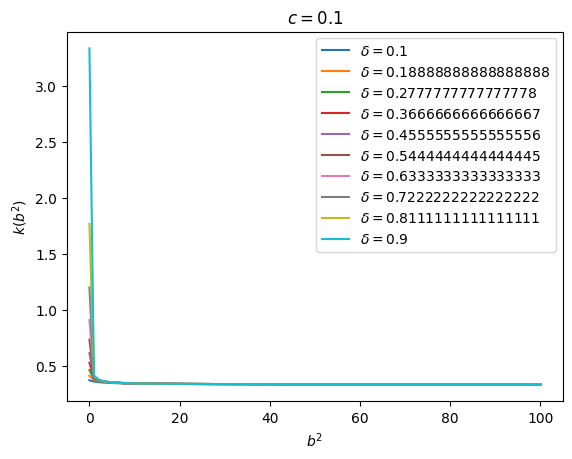

In [10]:
def plot_result(c_test, b2_max):
    for delta_test in np.linspace(0.1, 0.9, 10):
        expr = result.subs(c, c_test).subs(delta, delta_test)
        grid = np.linspace(0.0000001, b2_max, 100)
        plt.plot(grid, [expr.subs(b2, g) for g in grid], label = rf"$\delta = {delta_test}$")
        
    plt.xlabel("$b^2$")
    plt.ylabel("$k(b^2)$")
    plt.title(f"$c = {c_test}$")
    plt.legend()
    plt.show()

plot_result(0.1, 100)

The same plot but zoomed in:

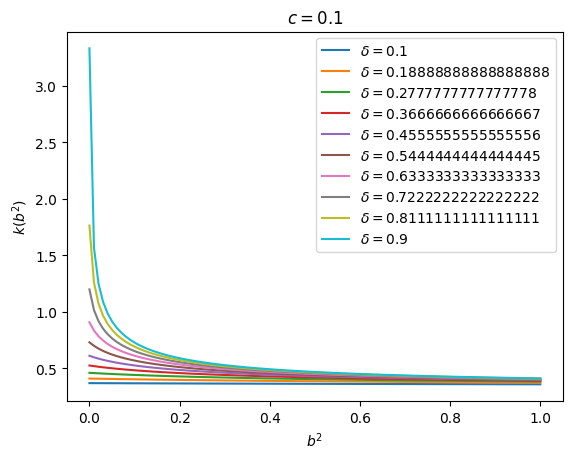

In [11]:
plot_result(0.1, 1)

Increasing $c$ to 1:

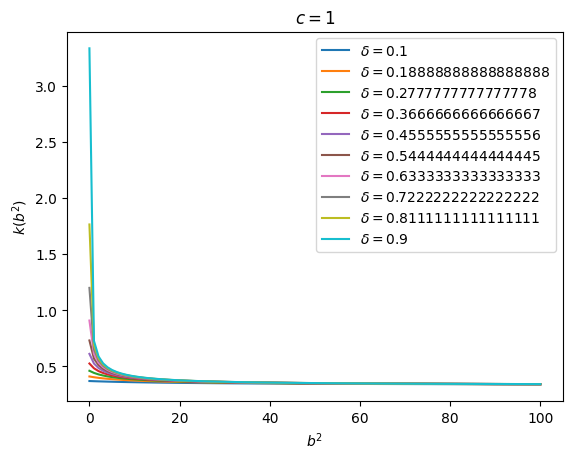

In [12]:
plot_result(1, 100)

The same plot but zoomed in:

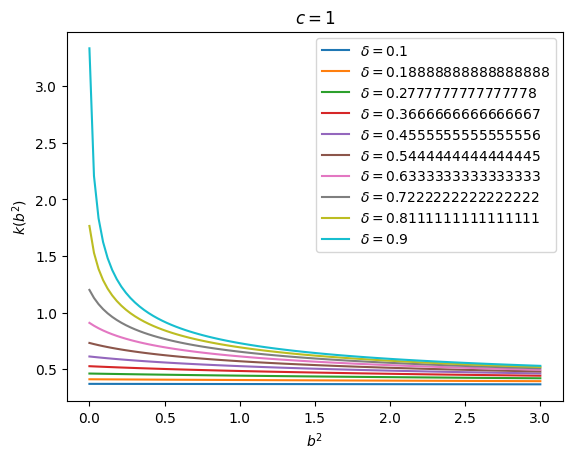

In [13]:
plot_result(1, 3)

Increasing $c$ to 10:

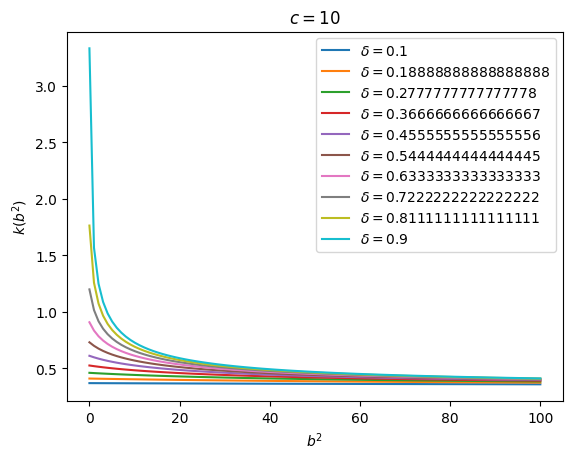

In [14]:
plot_result(10, 100)

Increasing $c$ to 100:

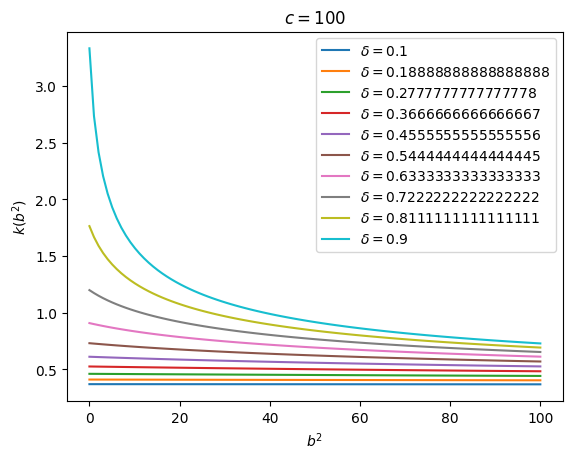

In [15]:
plot_result(100, 100)